# Decision Tree Regression

## Importing the libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [26]:
df = pd.read_csv('SIH Data.csv')
df['Day'] = df['Day'].ffill()
df

,Day,Time,Temp,Rain(mm),Gust(km/hr),Rain%,IsHoliday,Load (MW)
0,Jul-1,9:00,NaN,NaN,NaN,NaN,0,4883.13
1,Jul-1,12:00,NaN,NaN,NaN,NaN,0,5973.19
2,Jul-1,15:00,NaN,NaN,NaN,NaN,0,6782.73
3,Jul-1,21:00,NaN,NaN,NaN,NaN,0,6496.58
4,Jul-2,9:00,NaN,NaN,NaN,NaN,0,5252.95
...,...,...,...,...,...,...,...,...
243,Aug-30,21:00,37.0,0.0,9.0,0.0,0,5570.15
244,Aug-31,9:00,37.0,0.0,7.0,0.0,0,4613.17
245,Aug-31,12:00,41.0,0.0,10.0,0.0,0,5595.74
246,Aug-31,15:00,40.0,0.1,9.0,0.0,0,5961.56


In [27]:
df['Datetime'] = pd.to_datetime(df['Day'] + ' ' + df['Time'], format='%b-%d %H:%M')
df.set_index('Datetime', inplace=True)
df.drop(columns=['Day', 'Time'], inplace=True)
df = df.dropna(how='any',axis=0)

In [28]:
df

,Temp,Rain(mm),Gust(km/hr),Rain%,IsHoliday,Load (MW)
Datetime,,,,,,
1900-07-07 09:00:00,31.0,0.2,9.0,100.0,1,3983.84
1900-07-07 12:00:00,33.0,0.0,10.0,45.0,1,4877.60
1900-07-07 15:00:00,32.0,0.0,17.0,45.0,1,5278.73
1900-07-07 21:00:00,32.0,0.0,10.0,45.0,1,4973.65
1900-07-11 09:00:00,43.0,0.0,12.0,0.0,0,4983.46
...,...,...,...,...,...,...
1900-08-30 21:00:00,37.0,0.0,9.0,0.0,0,5570.15
1900-08-31 09:00:00,37.0,0.0,7.0,0.0,0,4613.17
1900-08-31 12:00:00,41.0,0.0,10.0,0.0,0,5595.74


In [29]:
features = ['Temp', 'Rain(mm)', 'Gust(km/hr)', 'Rain%', 'IsHoliday']
target = 'Load (MW)'

X = df[features]
y = df[[target]]

## Splitting the dataset into the Training set and Test set

In [30]:
from sklearn.model_selection import train_test_split

train_size = 0.8  # 80% of data for training, 20% for testing
split_index = int(len(df) * train_size)

# Splitting the data chronologically
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (64, 5) (64, 1)
Testing data shape: (16, 5) (16, 1)


## Feature Scaling!!

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
yc = StandardScaler()
# Fit the scaler only on the training data
X_train_sc = sc.fit_transform(X_train)
y_train_sc = yc.fit_transform(y_train)

# Transform the test data with the same scaler
X_test_sc = sc.transform(X_test)
#y_test_sc = yc.transform(y_test)

## Training the Decision Tree Regression model on the Training set

In [32]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_sc, y_train_sc.squeeze())

SVR()

## Predicting the Test set results

Predicted        Actual          Error
5280.28 	 4553.19 	 727.09
5923.26 	 5540.36 	 382.90
5546.36 	 6069.53 	 523.17
5218.23 	 5335.68 	 117.45
5351.76 	 4407.91 	 943.85
5688.15 	 5239.42 	 448.73
5654.14 	 5510.95 	 143.19
5232.02 	 5045.18 	 186.84
5277.06 	 4589.81 	 687.25
5590.91 	 5678.58 	 87.67
5550.97 	 6158.84 	 607.87
5299.43 	 5570.15 	 270.72
5322.59 	 4613.17 	 709.42
5629.77 	 5595.74 	 34.03
5580.44 	 5961.56 	 381.12
5310.96 	 5854.81 	 543.85


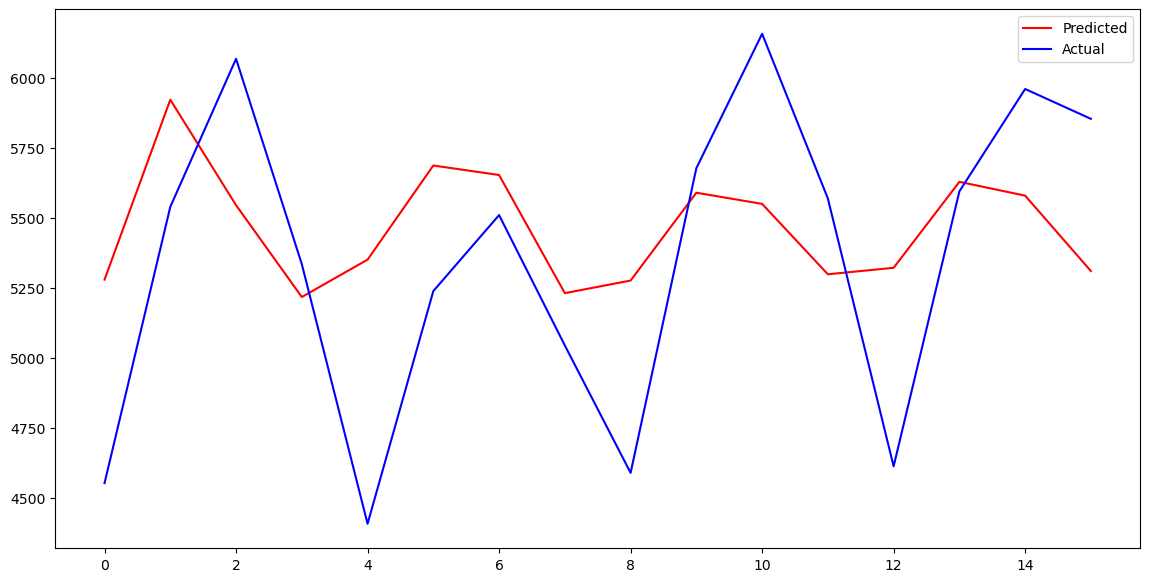

In [33]:
y_pred_sc = regressor.predict(X_test_sc)
y_pred = yc.inverse_transform(y_pred_sc.reshape(-1,1))

print('Predicted        Actual          Error')
for i,j in zip(y_pred, y_test.values):
    print(f"{i[0]:.2f} \t {j[0]:.2f} \t {abs(i[0]-j[0]):.2f}")

plt.figure(figsize=(14, 7))
plt.plot(y_pred, color='r', label='Predicted')
plt.plot(y_test.values, color='b', label='Actual')
plt.legend()
plt.show()


## Evaluating the Model Performance

In [34]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae}')

MAE: 424.6981505914847
